# Ejemplo 2

In [2]:
setwd("D:/Estadistica")

In [3]:
DATOS<-read.table("Ejemplo1.csv", header=TRUE, sep=",")
DATOS

individuo,tiempo,falla
1,4,1
2,20,1
3,9,0
4,6,0
5,8,0
6,20,1
7,7,0
8,3,0
9,5,1
10,2,0


In [5]:
library(survival)

Warning message:
"package 'survival' was built under R version 3.6.3"

**Análisis descriptivo.**

In [6]:
sum(DATOS$falla)

[1] 26

Número de eventos de interés

In [7]:
length(DATOS$falla)-sum(DATOS$falla)

[1] 34

Número de eventos censurados

**Cálculo de tiempo promedio para ítems**

**Censurados**

In [8]:
mean(DATOS$tiempo[DATOS$falla==0])

[1] 8.558824

**Evento de interés**

In [9]:
mean(DATOS$tiempo[DATOS$falla==1])

[1] 11.65385

**Gráfica de pastel**

## Análisis de supervivencia

In [11]:
d1<-Surv(DATOS$tiempo, DATOS$falla) #Cuando tenemos 0 y 1, no es necesario especificar
d1

 [1]  4  20   9+  6+  8+ 20   7+  3+  5   2+  5+  0+  4  12   3+  6+ 16+  5+  5+
[20] 19   9+ 16  10   8+ 18+ 19  18   5+ 15  13+  8+  3  14+ 11+  3+  9+  2  11+
[39] 16+ 17+  6   6+  9   9  11+ 13   7+  8  13+ 10+  8+ 13  19  20  11   4   7+
[58] 13  11  12+

**Estimación de Kaplan Meier**

*Estimación sin discriminante*

In [12]:
KM.d1<-survfit(d1~1)
KM.d1

Call: survfit(formula = d1 ~ 1)

      n  events  median 0.95LCL 0.95UCL 
     60      26      16      13      NA 

In [13]:
summary(KM.d1)

Call: survfit(formula = d1 ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    2     59       1    0.983  0.0168       0.9507        1.000
    3     57       1    0.966  0.0238       0.9203        1.000
    4     53       3    0.911  0.0380       0.8397        0.989
    5     50       1    0.893  0.0414       0.8154        0.978
    6     45       1    0.873  0.0450       0.7893        0.966
    8     38       1    0.850  0.0493       0.7588        0.952
    9     33       2    0.799  0.0582       0.6922        0.921
   10     28       1    0.770  0.0627       0.6564        0.903
   11     26       2    0.711  0.0705       0.5852        0.863
   12     21       1    0.677  0.0749       0.5451        0.841
   13     19       3    0.570  0.0847       0.4260        0.763
   15     13       1    0.526  0.0888       0.3780        0.733
   16     12       1    0.482  0.0916       0.3324        0.700
   18      8       1    0.422  0.0980       0.2677        0.665
   19  

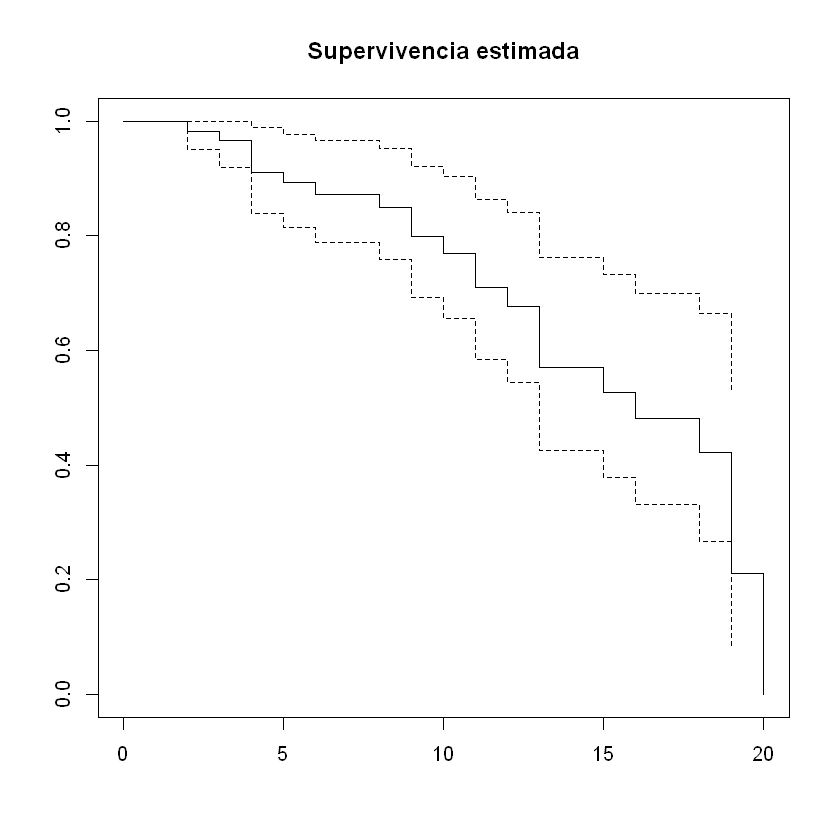

In [15]:
plot(KM.d1, main="Supervivencia estimada")

In [16]:
t<-c(2, 12, 18) #Suponiendo un vector de tiempos de interes

In [17]:
summary(KM.d1, t)

Call: survfit(formula = d1 ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    2     59       1    0.983  0.0168        0.951        1.000
   12     21      13    0.677  0.0749        0.545        0.841
   18      8       6    0.422  0.0980        0.268        0.665

**Creando un vector de clasificación**

In [18]:
turno<-c(rep(1,30), rep(2,30))
turno

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

**KM para comparación**

In [19]:
km.t<-survfit(d1~turno)

Indicando un discriminante.
Si hay 2 debería hacer dos clasificaciones , genera dos funciones de supervivencia.

In [20]:
summary(km.t)

Call: survfit(formula = d1 ~ turno)

                turno=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    4     26       2    0.923  0.0523       0.8261        1.000
    5     24       1    0.885  0.0627       0.7700        1.000
   10     12       1    0.811  0.0910       0.6508        1.000
   12     11       1    0.737  0.1086       0.5524        0.984
   15      9       1    0.655  0.1236       0.4528        0.948
   16      8       1    0.573  0.1325       0.3645        0.902
   18      6       1    0.478  0.1407       0.2682        0.851
   19      4       2    0.239  0.1386       0.0766        0.745
   20      2       2    0.000     NaN           NA           NA

                turno=2 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    2     30       1    0.967  0.0328        0.905        1.000
    3     29       1    0.933  0.0455        0.848        1.000
    4     27       1    0.899  0.0554        0.796        1.000
    6     26    

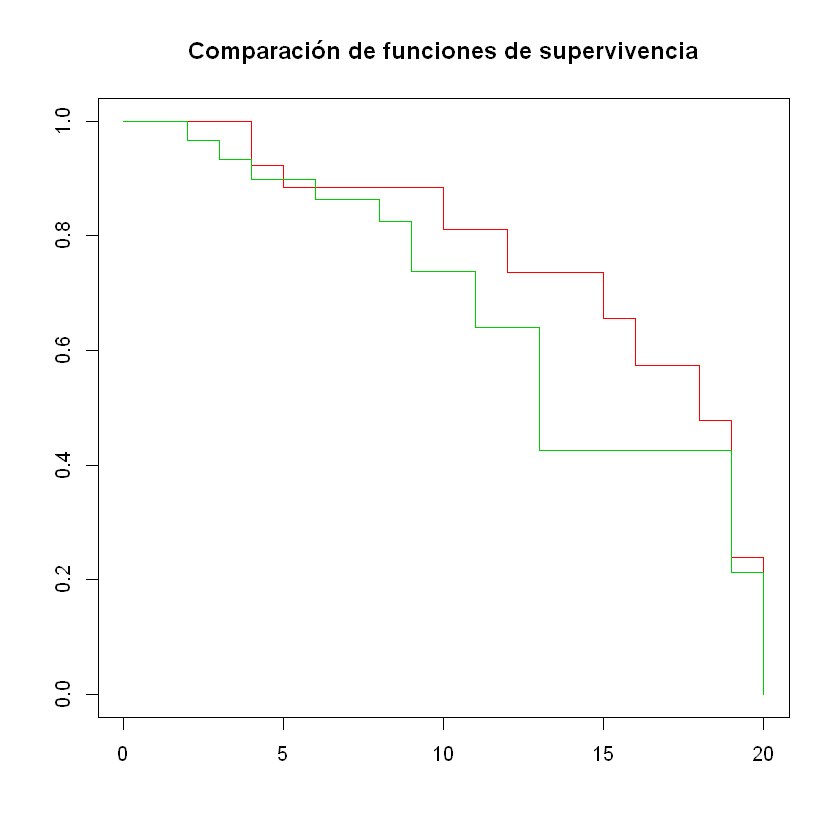

In [24]:
plot(km.t, col=c(2, 3), main="Comparación de funciones de supervivencia")#poner dos colores

**Estimaciones de supervivencia por turno**

In [28]:
km.t1<-survfit(d1[1:30]~1)
km.t1

Call: survfit(formula = d1[1:30] ~ 1)

      n  events  median 0.95LCL 0.95UCL 
     30      12      18      15      NA 

In [33]:
summary(km.t[1])

Call: survfit(formula = d1 ~ turno)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    4     26       2    0.923  0.0523       0.8261        1.000
    5     24       1    0.885  0.0627       0.7700        1.000
   10     12       1    0.811  0.0910       0.6508        1.000
   12     11       1    0.737  0.1086       0.5524        0.984
   15      9       1    0.655  0.1236       0.4528        0.948
   16      8       1    0.573  0.1325       0.3645        0.902
   18      6       1    0.478  0.1407       0.2682        0.851
   19      4       2    0.239  0.1386       0.0766        0.745
   20      2       2    0.000     NaN           NA           NA

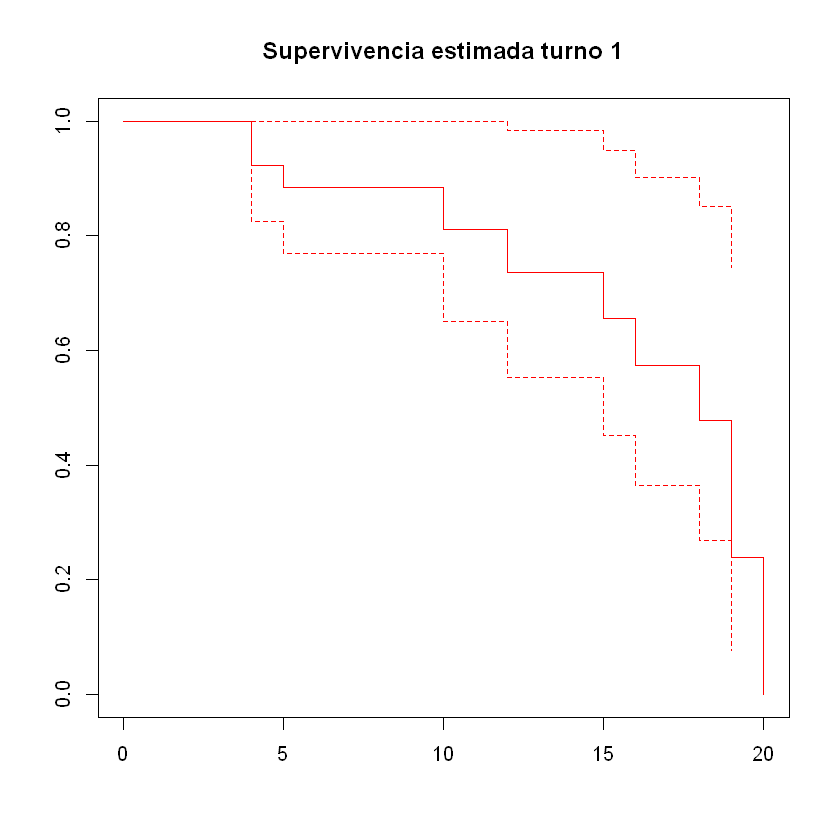

In [32]:
plot(km.t[1], col=2, main="Supervivencia estimada turno 1")

In [29]:
km.t2<-survfit(d1[31:60]~1)
km.t2

Call: survfit(formula = d1[31:60] ~ 1)

      n  events  median 0.95LCL 0.95UCL 
     30      14      13      11      NA 

In [34]:
summary(km.t[2])

Call: survfit(formula = d1 ~ turno)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    2     30       1    0.967  0.0328        0.905        1.000
    3     29       1    0.933  0.0455        0.848        1.000
    4     27       1    0.899  0.0554        0.796        1.000
    6     26       1    0.864  0.0632        0.749        0.997
    8     22       1    0.825  0.0715        0.696        0.978
    9     19       2    0.738  0.0864        0.587        0.928
   11     15       2    0.640  0.0990        0.472        0.866
   13      9       3    0.426  0.1202        0.245        0.741
   19      2       1    0.213  0.1623        0.048        0.948
   20      1       1    0.000     NaN           NA           NA

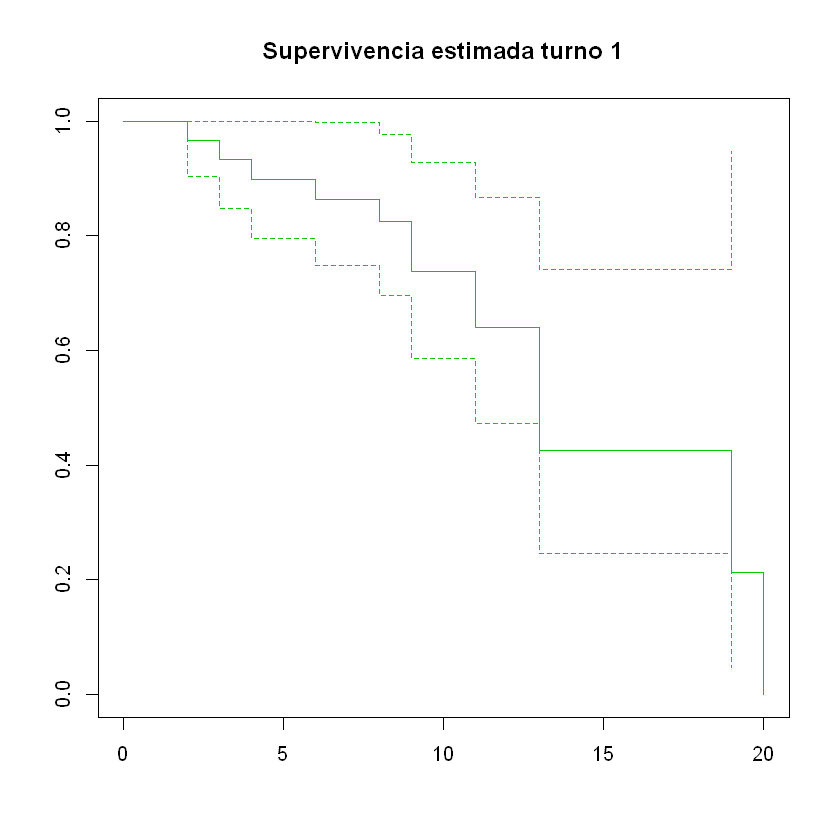

In [31]:
plot(km.t[2], col=3, main="Supervivencia estimada turno 2")

**Graficando en la misma ventana**

In [39]:
par(mfrow=c(1,3))#1 renglón con 3 columnas

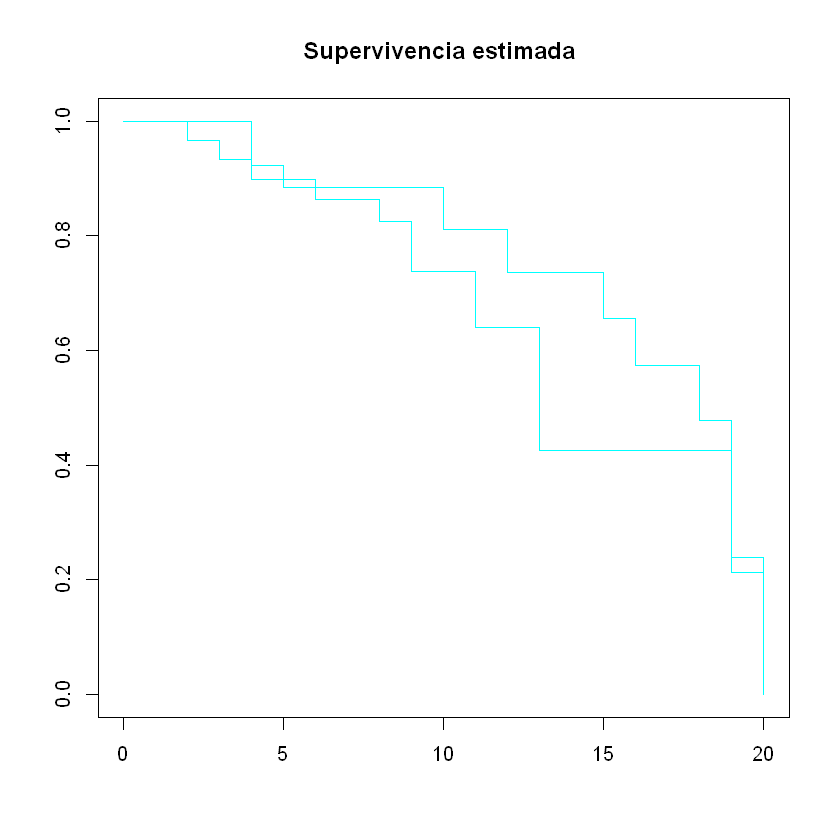

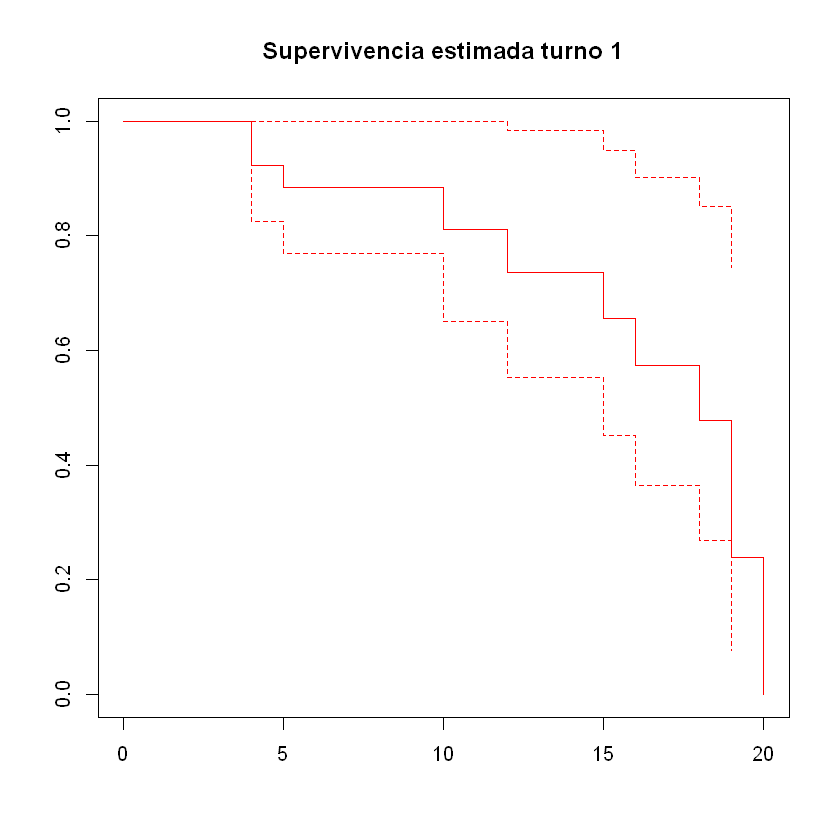

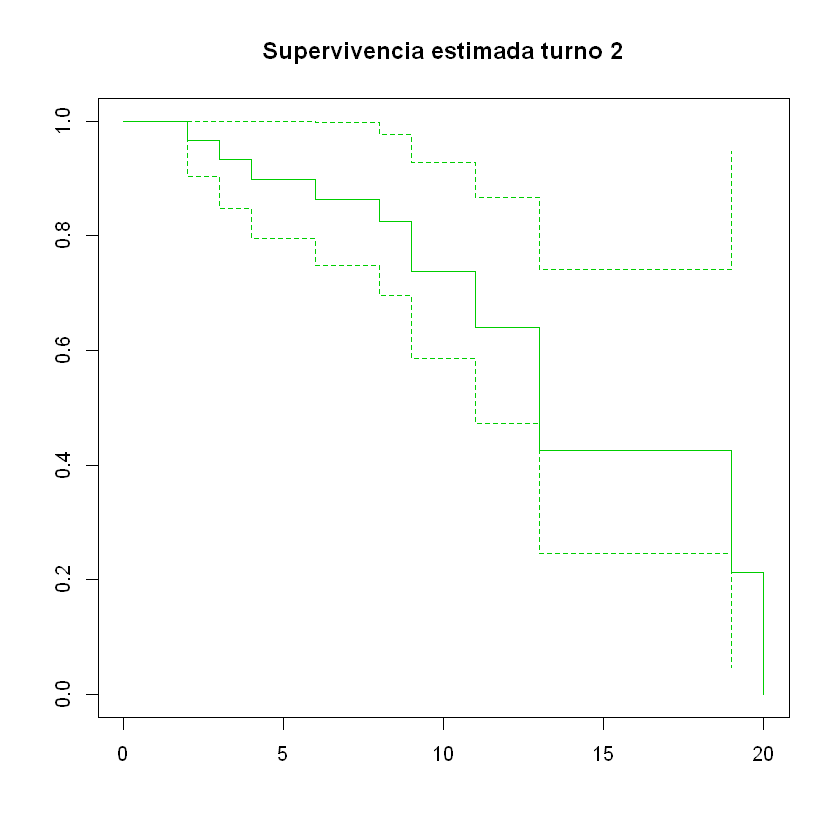

In [37]:
plot(km.t, col=5, main="Supervivencia estimada ")
plot(km.t[1], col=2, main="Supervivencia estimada turno 1")
plot(km.t[2], col=3, main="Supervivencia estimada turno 2")

**Prueba de igualdad de funciones de supervivencia**

* H0: Las funciones de supervivencia son iguales.
* Ha: Las funciones de supervivencia difieren.

In [40]:
survdiff(d1~turno, rho=0)

Call:
survdiff(formula = d1 ~ turno, rho = 0)

         N Observed Expected (O-E)^2/E (O-E)^2/V
turno=1 30       12     14.1     0.316     0.878
turno=2 30       14     11.9     0.375     0.878

 Chisq= 0.9  on 1 degrees of freedom, p= 0.3 

**Conclusión:** No se rechaza H0, con un intervalo de confianza del 95% las funciones de supervivencia son iguales.

**Nota:** Cuando son diferentes, puedo arriesgrame a hacer una sugerencia (en caso médico).

In [41]:
par(mfrow=c(1,1))

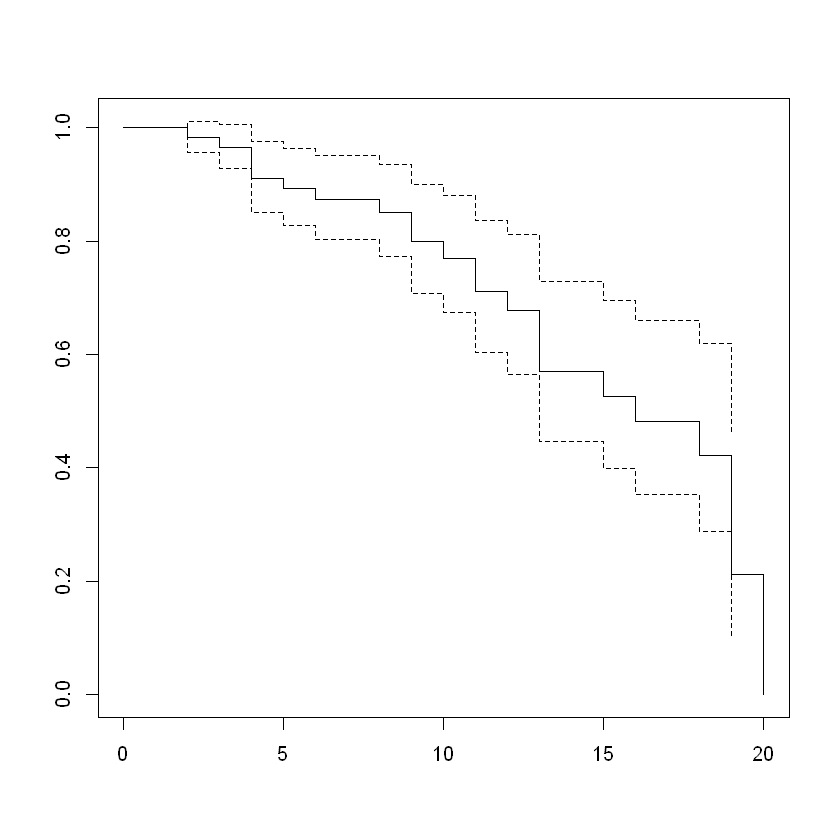

In [44]:
plot(survfit(d1~1), conf.int=0.90)

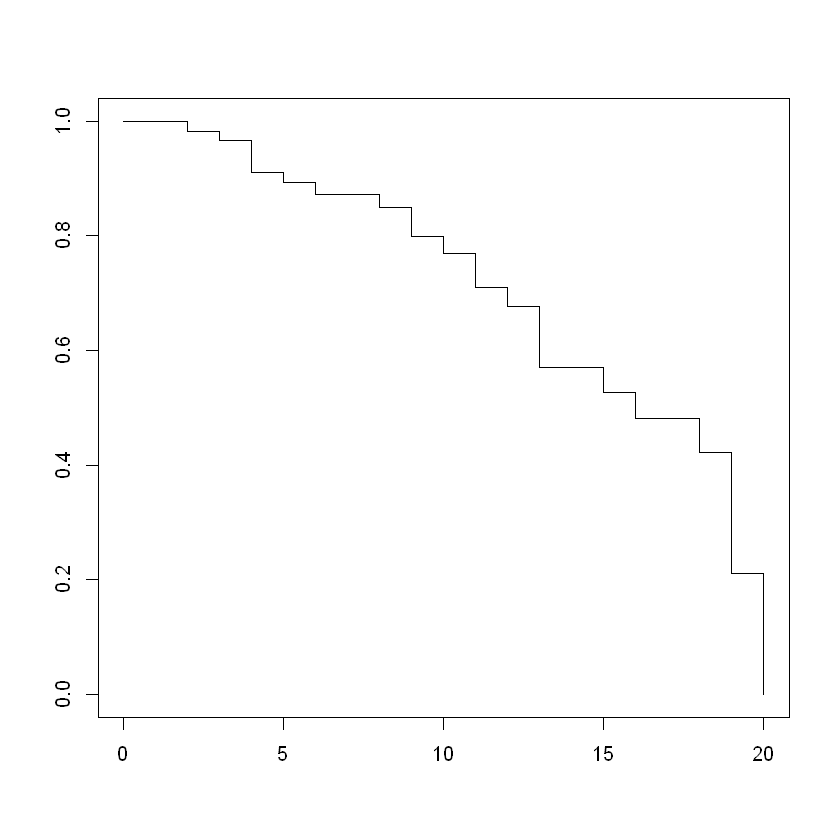

In [45]:
plot(survfit(d1~1), conf.int=F)

In [46]:
data("heart")

In [48]:
d2<-heart
d2

start,stop,event,age,year,surgery,transplant,id
0,50,1,-17.15537303,0.1232033,0,0,1
0,6,1,3.83572895,0.2546201,0,0,2
0,1,0,6.29705681,0.2655715,0,0,3
1,16,1,6.29705681,0.2655715,0,1,3
0,36,0,-7.73716632,0.4900753,0,0,4
36,39,1,-7.73716632,0.4900753,0,1,4
0,18,1,-27.21423682,0.6078029,0,0,5
0,3,1,6.59548255,0.7008898,0,0,6
0,51,0,2.86926762,0.7802875,0,0,7
51,675,1,2.86926762,0.7802875,0,1,7


In [49]:
names(d2)

[1] "start"      "stop"       "event"      "age"        "year"      
[6] "surgery"    "transplant" "id"

considerando event como 1=muerte
tiempo, falla

In [50]:
tiempos<-d2$stop-d2$start
cora<-Surv(tiempos, d2$event)
cora

  [1]   50.0     6.0     1.0+   15.0    36.0+    3.0    18.0     3.0    51.0+
 [10]  624.0    40.0    85.0    12.0+   46.0    26.0+  127.0     8.0    17.0+
 [19]   64.0    37.0+ 1350.0     1.0    28.0+  280.0    36.0    20.0+   23.0 
 [28]   37.0    18.0+   10.0     8.0+ 1024.0    12.0+   39.0     3.0+  730.0 
 [37]   83.0+  136.0    25.0+ 1775.0+ 1401.0+  263.0    71.0+    1.0    35.0 
 [46]   16.0+  836.0    16.0    17.0+   60.0    51.0+ 1536.0+   23.0+ 1549.0+
 [55]   12.0    46.0+   54.0    19.0+   47.0     4.5+    0.5     2.0+   51.0 
 [64]   41.0+ 1367.0+   58.0+ 1264.0+    3.0     2.0    40.0     1.0+   44.0 
 [73]    2.0+  994.0    21.0+   51.0     9.0    36.0+ 1106.0+   83.0+  897.0 
 [82]   32.0+  253.0   102.0    41.0+  147.0     3.0    10.0+   51.0    67.0+
 [91]  875.0+  149.0    21.0+  322.0    78.0+  838.0+    3.0+   65.0     2.0 
[100]   69.0    27.0+  815.0+   33.0+  551.0    12.0+   66.0    32.0    57.0+
[109]  228.0     3.0+   65.0    10.0+  660.0+    5.0+   25.0    

*Revisar si exise diferencia en la supervivencia de un paciente con transplante previo* 

**Estimación de Kaplan Meier**

In [51]:
km.trans<-survfit(cora~d2$transplant)
km.trans

Call: survfit(formula = cora ~ d2$transplant)

                  n events median 0.95LCL 0.95UCL
d2$transplant=0 103     30    149      69      NA
d2$transplant=1  69     45    228      66     836

In [52]:
summary(km.trans)

Call: survfit(formula = cora ~ d2$transplant)

                d2$transplant=0 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1    103       1    0.990 0.00966       0.9715        1.000
    2    100       3    0.961 0.01932       0.9235        0.999
    3     94       3    0.930 0.02555       0.8812        0.981
    5     85       1    0.919 0.02750       0.8666        0.974
    6     82       2    0.897 0.03106       0.8377        0.960
    8     79       1    0.885 0.03267       0.8234        0.952
    9     76       1    0.874 0.03426       0.8089        0.943
   12     72       1    0.861 0.03587       0.7939        0.935
   16     67       1    0.849 0.03756       0.7781        0.925
   18     63       1    0.835 0.03931       0.7615        0.916
   21     59       2    0.807 0.04277       0.7272        0.895
   32     43       1    0.788 0.04571       0.7034        0.883
   35     39       1    0.768 0.04880       0.6779        0.870
   36     38       1    

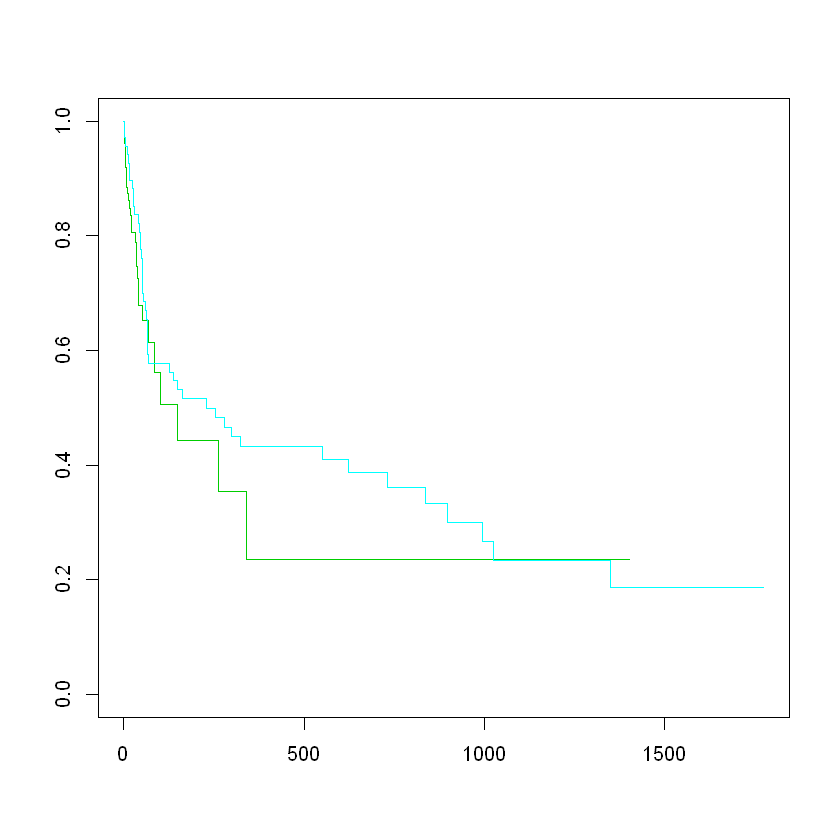

In [53]:
plot(km.trans, col=c(3,5))

*Aquí gráficamente se ve que son diferentes, pero no podemos afirmarlo solo por esto, por lo que debemos hacer la comparación de las fns de supervivencia*

**Comparando funciones de supervivencia**

In [54]:
survdiff(cora~d2$transplant, rho=0)

Call:
survdiff(formula = cora ~ d2$transplant, rho = 0)

                  N Observed Expected (O-E)^2/E (O-E)^2/V
d2$transplant=0 103       30     26.7     0.397     0.712
d2$transplant=1  69       45     48.3     0.220     0.712

 Chisq= 0.7  on 1 degrees of freedom, p= 0.4 

Nota: No hay diferencia 

Revisar si exise diferencia en la supervivencia de un paciente con cirugía previo 

In [55]:
km.cir<-survfit(cora~d2$surgery)
km.cir

Call: survfit(formula = cora ~ d2$surgery)

               n events median 0.95LCL 0.95UCL
d2$surgery=0 143     66    102      64     280
d2$surgery=1  29      9    897     322      NA

In [56]:
summary(km.cir)

Call: survfit(formula = cora ~ d2$surgery)

                d2$surgery=0 
   time n.risk n.event survival std.err lower 95% CI upper 95% CI
    0.5    143       1    0.993 0.00697       0.9794        1.000
    1.0    142       1    0.986 0.00982       0.9670        1.000
    2.0    139       2    0.972 0.01389       0.9450        0.999
    3.0    135       4    0.943 0.01956       0.9055        0.982
    5.0    126       1    0.936 0.02079       0.8957        0.977
    6.0    123       2    0.920 0.02307       0.8762        0.967
    8.0    120       1    0.913 0.02412       0.8666        0.961
    9.0    117       1    0.905 0.02514       0.8569        0.956
   10.0    116       1    0.897 0.02611       0.8473        0.950
   12.0    112       2    0.881 0.02799       0.8279        0.938
   14.0    105       1    0.873 0.02895       0.8177        0.931
   15.0    104       1    0.864 0.02987       0.8077        0.925
   16.0    103       1    0.856 0.03073       0.7977        0.918
  

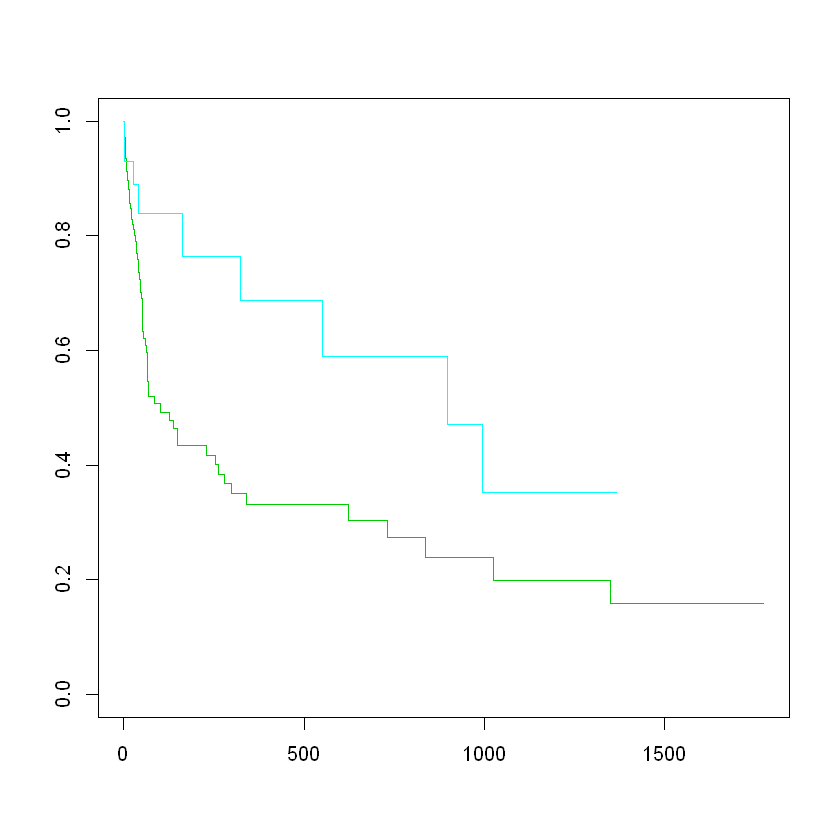

In [57]:
plot(km.cir, col=c(3,5))

In [58]:
survdiff(cora~d2$surgery, rho=0)

Call:
survdiff(formula = cora ~ d2$surgery, rho = 0)

               N Observed Expected (O-E)^2/E (O-E)^2/V
d2$surgery=0 143       66     57.8      1.15      5.17
d2$surgery=1  29        9     17.2      3.87      5.17

 Chisq= 5.2  on 1 degrees of freedom, p= 0.02 

Las funciones de supervivencia difieren

Ojo apoyados en la gráfica, los pacientes con cirugía son los que tienen mayor supervivencia 
La curva que este más arriba es la que tiene mayor probabilidad de supervivencia.

In [60]:
summary(km.cir[1]) # corresponde a la primer impresión, sin cirugía

Call: survfit(formula = cora ~ d2$surgery)

   time n.risk n.event survival std.err lower 95% CI upper 95% CI
    0.5    143       1    0.993 0.00697       0.9794        1.000
    1.0    142       1    0.986 0.00982       0.9670        1.000
    2.0    139       2    0.972 0.01389       0.9450        0.999
    3.0    135       4    0.943 0.01956       0.9055        0.982
    5.0    126       1    0.936 0.02079       0.8957        0.977
    6.0    123       2    0.920 0.02307       0.8762        0.967
    8.0    120       1    0.913 0.02412       0.8666        0.961
    9.0    117       1    0.905 0.02514       0.8569        0.956
   10.0    116       1    0.897 0.02611       0.8473        0.950
   12.0    112       2    0.881 0.02799       0.8279        0.938
   14.0    105       1    0.873 0.02895       0.8177        0.931
   15.0    104       1    0.864 0.02987       0.8077        0.925
   16.0    103       1    0.856 0.03073       0.7977        0.918
   18.0     99       1    0.847 

In [61]:
summary(km.cir[2]) # corresponde a la segunda impresión, con cirugía

Call: survfit(formula = cora ~ d2$surgery)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1     29       1    0.966  0.0339        0.901        1.000
    2     27       1    0.930  0.0479        0.840        1.000
   26     23       1    0.889  0.0605        0.778        1.000
   40     18       1    0.840  0.0747        0.706        1.000
  161     11       1    0.764  0.0995        0.591        0.986
  322     10       1    0.687  0.1152        0.495        0.955
  551      7       1    0.589  0.1342        0.377        0.921
  897      5       1    0.471  0.1504        0.252        0.881
  994      4       1    0.353  0.1521        0.152        0.822

Si el paciente antes o después de los 48 tiene diferente supervivencia

In [63]:
critico<-d2$age
critico[critico<0]<-0 
#guardar cero en esas posiciones
critico[critico>0]<-1
critico
#indica si el paciente es mayor a 48

[1] 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1
 [38] 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1
 [75] 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0
[112] 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1
[149] 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0

In [64]:
km.edad<-survfit(cora~critico)
km.edad

Call: survfit(formula = cora ~ critico)

           n events median 0.95LCL 0.95UCL
critico=0 91     36    228     127      NA
critico=1 81     39     68      60     624

In [65]:
summary(km.edad)

Call: survfit(formula = cora ~ critico)

                critico=0 
   time n.risk n.event survival std.err lower 95% CI upper 95% CI
    0.5     91       1    0.989  0.0109        0.968        1.000
    2.0     88       1    0.978  0.0155        0.948        1.000
    3.0     86       3    0.944  0.0245        0.897        0.993
    5.0     79       1    0.932  0.0269        0.880        0.986
    6.0     77       1    0.920  0.0292        0.864        0.979
   12.0     73       2    0.894  0.0334        0.831        0.962
   14.0     67       1    0.881  0.0354        0.814        0.953
   18.0     65       1    0.868  0.0374        0.797        0.944
   21.0     64       1    0.854  0.0392        0.780        0.934
   36.0     53       1    0.838  0.0416        0.760        0.924
   39.0     48       1    0.820  0.0443        0.738        0.912
   40.0     47       2    0.785  0.0488        0.695        0.887
   44.0     44       1    0.768  0.0508        0.674        0.874
   46.0 

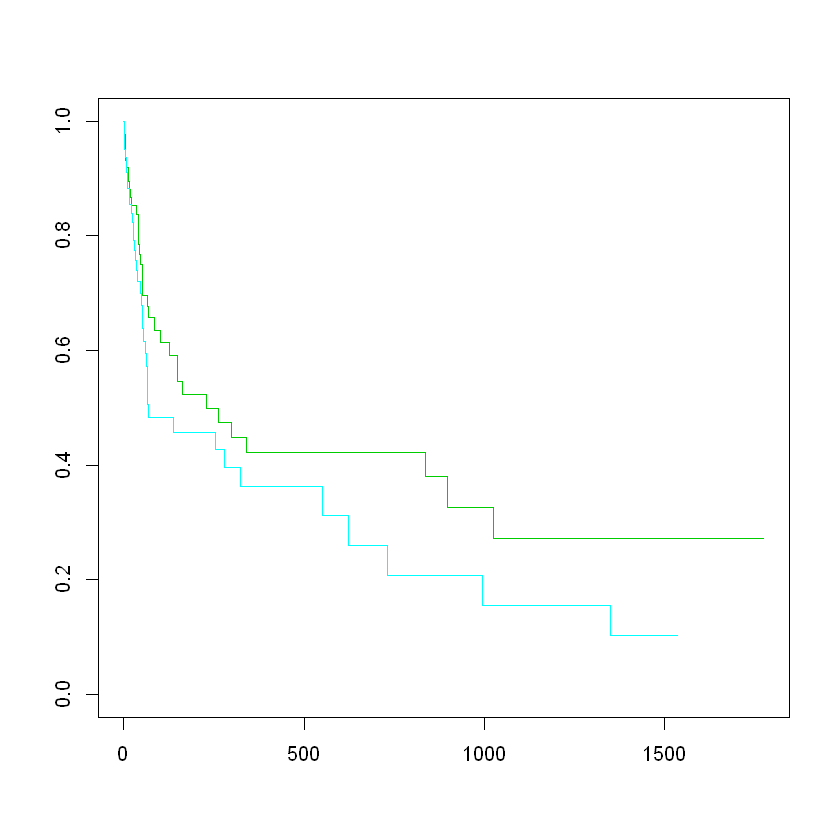

In [66]:
plot(km.edad, col=c(3,5))

In [67]:
survdiff(cora~critico, rho=0)

Call:
survdiff(formula = cora ~ critico, rho = 0)

           N Observed Expected (O-E)^2/E (O-E)^2/V
critico=0 91       36     42.5     0.983      2.29
critico=1 81       39     32.5     1.283      2.29

 Chisq= 2.3  on 1 degrees of freedom, p= 0.1 

las funciones de supervivencia son iguales al 95% 

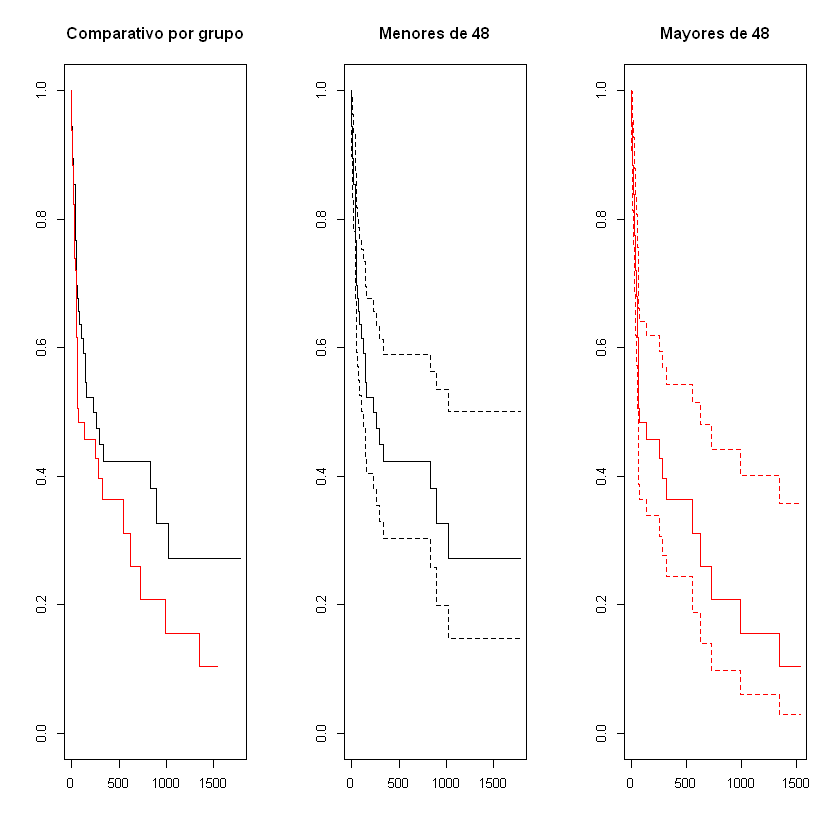

In [68]:
par(mfrow=c(1,3))
plot(km.edad, col=c(1,10), main="Comparativo por grupo")
plot(km.edad[1], col=c(1), main="Menores de 48")
plot(km.edad[2], col=c(10), main="Mayores de 48")